## Convolutional neural network using Tensorflow

In [1]:
import tensorflow 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from memory_profiler import profile

**Import of the MNIST data set**
***

In [2]:
from tensorflow.keras.datasets import mnist

(x_train, y_train) , (x_test, y_test) = mnist.load_data()

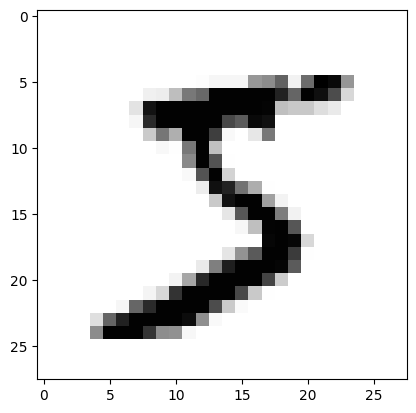

In [3]:
plt.imshow(x_train[0], cmap='Greys')
plt.show()

**Convolutional Neural Network (CNN)**
***

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
x_train = x_train.reshape((60000, 28,28,1))
x_train = x_train / 255.0 # normalization - pixel values from 0 to 1

x_test = x_test.reshape((10000, 28,28,1))
x_test  = x_test / 255.0 # normalization - pixel values from 0 to 1

<u>Activation functions</u>

**ReLu** (ang. Rectified Linear Unit) is an activation function that returns the input value if it is positive or 0 if it is negative.

**Softmax** is an activation function used in neural networks that transforms input values (also called logits) into a probability distribution.

In [8]:
def CNN_model():
    model = models.Sequential()
#     convolution layer
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
#     pooling layer 
    model.add(layers.MaxPool2D((2, 2)))
#     fully connected layer
    model.add(layers.Flatten())
    model.add(layers.Dense(100, activation='relu'))
#     output layer
    model.add(layers.Dense(10, activation='softmax'))
    
    return model

In [9]:
model = CNN_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
__________________________________________________

**Training**
***
**Loss function** - this function measures the difference between the predicted value and the true value of a model. The goal is to minimize the value of this function.

**Cross-entropy** - it is a measure of difference between two probability distributions, the distribution of true values and distribution of predicted values. 

**Sparse Categorical Crossentropy** - it is a variant of categorical crossentropy where target labels are represented by integers.

**Optimizer** - it defines a way of modifying the model of neural network (weights and biases) during the training process based on loss function. 

**Optimizer ADAM (Adaptive Moment Estimation)** - it is an adaptive optimizer. It updates the learning rate for each weight dynamically based on the gradients of past steps.

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

x_train = x_train[0:500]
y_train = y_train[0:500]

history = LossHistory()
model.fit(x=x_train, y=y_train, batch_size=10, epochs=3, callbacks=[history])

Epoch 1/3
50/50 [==============================] - 4s 23ms/step - loss: 1.1273 - accuracy: 0.6820
Epoch 2/3
50/50 [==============================] - 1s 27ms/step - loss: 0.3773 - accuracy: 0.8960
Epoch 3/3
50/50 [==============================] - 1s 23ms/step - loss: 0.1996 - accuracy: 0.9480


In [11]:
print(history.losses)
print(len(history.losses))

[2.3089051246643066, 2.307141065597534, 2.2261712551116943, 2.1457557678222656, 2.153463840484619, 2.1221272945404053, 2.0717010498046875, 2.046260356903076, 2.0547900199890137, 2.015258550643921, 1.9672534465789795, 1.9786268472671509, 1.924225091934204, 1.8932605981826782, 1.8477870225906372, 1.8379757404327393, 1.774562120437622, 1.7376054525375366, 1.6827341318130493, 1.6621067523956299, 1.6582772731781006, 1.6235936880111694, 1.6109657287597656, 1.5859310626983643, 1.570955753326416, 1.5429242849349976, 1.5112470388412476, 1.4733755588531494, 1.4652076959609985, 1.4456201791763306, 1.4084256887435913, 1.3939212560653687, 1.3704345226287842, 1.363252878189087, 1.3439072370529175, 1.3299734592437744, 1.3076159954071045, 1.2840496301651, 1.2689704895019531, 1.2561676502227783, 1.2391667366027832, 1.214058518409729, 1.2024508714675903, 1.1947227716445923, 1.1711329221725464, 1.1547366380691528, 1.141879916191101, 1.1478335857391357, 1.14114248752594, 1.1273270845413208, 0.511079192161

50


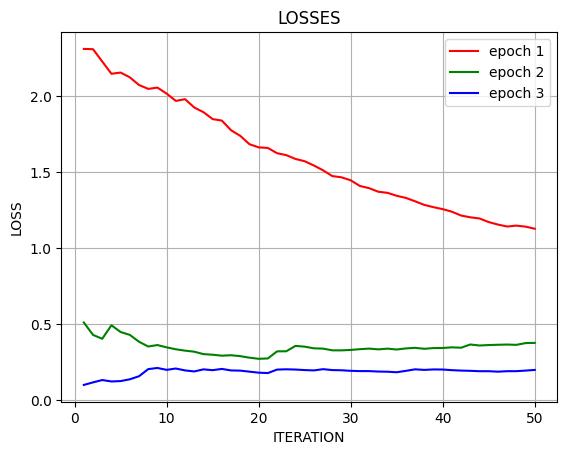

In [12]:
import matplotlib.pyplot as plt

loss_no = list(range(1,51))
print(len(history.losses[50:100]))
plt.plot(loss_no, history.losses[0:50], color='red', label='epoch 1')
plt.plot(loss_no, history.losses[50:100], color='green', label='epoch 2')
plt.plot(loss_no, history.losses[100:150], color='blue', label='epoch 3')
plt.legend()
plt.grid(True)
plt.xlabel('ITERATION')
plt.ylabel('LOSS')
plt.title('LOSSES')
plt.show()

**Test**
***

In [13]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 10ms/step - loss: 0.5441 - accuracy: 0.8375


[0.5441386699676514, 0.8374999761581421]

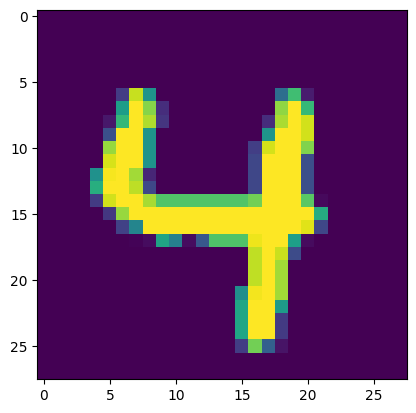

In [14]:
idx = 163
img = x_test[idx].reshape(28, 28)
plt.imshow(img)

**Prediction**
***

In [15]:
predictions = model.predict(x_test)

313/313 [==============================] - 3s 9ms/step


In [16]:
predictions[idx]

array([2.2464649e-06, 4.8233623e-08, 1.4795172e-05, 2.6233361e-05,
       9.9582064e-01, 1.7115747e-06, 4.5283778e-06, 2.6512400e-03,
       9.9801427e-06, 1.4686099e-03], dtype=float32)

In [17]:
np.argmax(predictions[idx])

4

In [18]:
model.metrics_names

['loss', 'accuracy']

In [20]:
metrics = pd.DataFrame(history.losses)

In [21]:
metrics.head()

,0
0,2.308905
1,2.307141
2,2.226171
3,2.145756
4,2.153464
